In [1]:
import pandas as pd
import matplotlib.pylab as plt
from swat import *
from dlpy import Model, Sequential
from dlpy.model import *
from dlpy.layers import * 
from dlpy.speech import *
%matplotlib inline

In [2]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_colwidth', 500)

# Local Audio Data Exploration

In [3]:
# play one audio file
one_data_file = 'your_local_audio_file_path'

In [4]:
play_one_audio_file(one_data_file)

File location: C:\Users\username\Downloads\lang_id\train\en\en_f_5dff2b7b319207972450f91d569b5a16.fragment1.flac
Frequency [Hz]: 22050
Duration [s]: 10.0


In [5]:
# randomly select one audio file to play
one_data_dir = 'your_local_audio_file_directory'
play_one_audio_file(one_data_dir)

File location: C:\Users\username\Downloads\lang_id\train\es\es_f_1d27c6d589eeff17973ffd0b7a77a70a.fragment2.flac
Frequency [Hz]: 22050
Duration [s]: 10.0


File location: C:\Users\username\Downloads\lang_id\train\en\en_f_5dff2b7b319207972450f91d569b5a16.fragment1.flac


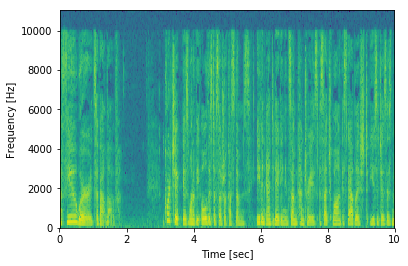

In [6]:
# display spectrogram for a given audio file
display_spectrogram_for_one_audio_file(one_data_file)

File location: C:\Users\username\Downloads\lang_id\train\de\de_f_5d2e7f30d69f2d1d86fd05f3bbe120c2.fragment2.flac


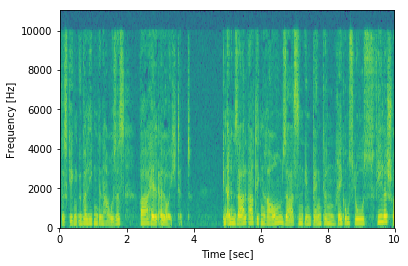

In [7]:
# display spectrogram for a randomly selected audio file
display_spectrogram_for_one_audio_file(one_data_dir)

File location: C:\Users\username\Downloads\lang_id\train\en\en_f_5dff2b7b319207972450f91d569b5a16.fragment1.flac


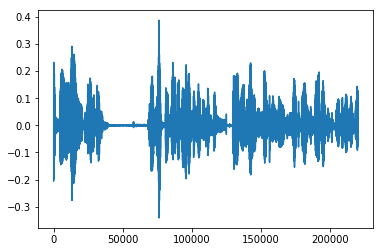

In [8]:
# display the raw audio data for a give audio file
display_raw_data_for_one_audio_file(one_data_file)

# Upload Audio Data to CAS

In [9]:
conn = CAS('host_name', port_number)

In [10]:
from dlpy.audio import AudioTable 

In [11]:
# both directories point to the same data location 
# if Python runs on the same node as CAS, only local_data_dir needs be specified
local_data_dir = 'local_data_path_that_can_be_accessed_by_Python'
server_data_dir = 'server_data_path_that_can_be_accessed_by_CAS'

In [12]:
# automatically convert all audio files under local_data_dir to the wav files with 1 channel, 16 bits, and 16 khz.
# then load all these wav files into CAS as a CAS table
audio_table = AudioTable.load_audio_files(conn, local_audio_path=local_data_dir,
                                         server_audio_path=server_data_dir)

File path: \data_dir\\train
Number of Files: 31
Cannot convert file \data_dir\\train\en\Thumbs.db
File conversions are finished.


In [13]:
# AudioTable inherits the SWAT CASTable class
type(audio_table)

dlpy.audio.AudioTable

In [14]:
audio_table.fetch(sastypes=False, to=2)

,_id_,_path_,_type_,_audio_
0,2,/data_dir/train/de/de_f_5d2e7f30d69f2d1d86fd05f3bbe120c2.fragment2.wav,wav,b'RIFF$\xe2\x04\x00WAVEfmt \x10\x00\x00\x00\x01\x00\x01\x00\x80>\x00\x00\x00}\x00\x00\x02\x00\x10\x00data\x00\xe2\x04\x00\x0b\x00\xe1\xff\xa5\x00\x9d\xff~\x00\xc6\xff\x89\x00\xea\xffg\x00!\x00\xd5\xff\xf6\xff\xb3\x00=\xffq\xff\x99\x00\xd3\xff\x86\xffP\xff\x16\x00\xbb\xffb\xff_\x00\xba\xff\x03\x00\xe8\xff\x19\x00\xc0\x00~\xffn\x00z\x00D\x001\x00\xef\xff\xbe\x00#\x00\x0f\x00\xdc\xffa\x00\xdc\xff\x1d\x00\xee\xff\xfd\xff\x07\x00\x92\xff\x10\x00\xef\xff\xc4\xffV\xff\x1b\x00\x87\xff\xe0\xff\xee\xf...
1,1,/data_dir/train/de/de_f_5d2e7f30d69f2d1d86fd05f3bbe120c2.fragment1.wav,wav,b'RIFF$\xe2\x04\x00WAVEfmt \x10\x00\x00\x00\x01\x00\x01\x00\x80>\x00\x00\x00}\x00\x00\x02\x00\x10\x00data\x00\xe2\x04\x00!\x02\r\xffn\xff0\x00\xfb\xff\xba\xff2\x00f\xff/\x00\x87\xff\x0e\x02a\xfe)\x00\xbe\x00\xe0\xfd\x98\x01N\xfe`\x00\xa4\xfe\xf4\x01\x05\xffk\x01\x8b\x00)\xfe%\x02W\x00\x99\xfe=\x02\x06\xffm\x00\x14\x01\xdb\xfer\xff\x1b\x01\xb7\xfd\xbf\x01\xcd\xfe\xf5\xfe\x90\x01\x1b\xffe\x00$\x00\x9d\xfe\xed\x00\x99\xff\x95\xfd\x8a\x02f\xfca\x03\xfb\xfd\x16\x02\x8f\xff\'\x01\xf6\xfe\x9c\x00e\...


# Extract Features from Audio

In [26]:
# extract MFCC features from the loaded audio CAS table and generate the class labels based on the directory 
feature_table = audio_table.create_audio_feature_table(label_level=-2, n_output_frames=1000, random_shuffle=True)

In [27]:
feature_table.fetch(to=2)

,_path_,_num_frames_,_f0_v0_,_f0_v1_,_f0_v2_,_f0_v3_,_f0_v4_,_f0_v5_,_f0_v6_,_f0_v7_,_f0_v8_,_f0_v9_,_f0_v10_,_f0_v11_,_f0_v12_,_f0_v13_,_f0_v14_,_f0_v15_,_f0_v16_,_f0_v17_,_f0_v18_,_f0_v19_,_f0_v20_,_f0_v21_,_f0_v22_,_f0_v23_,_f0_v24_,_f0_v25_,_f0_v26_,_f0_v27_,_f0_v28_,_f0_v29_,_f0_v30_,_f0_v31_,_f0_v32_,_f0_v33_,_f0_v34_,_f0_v35_,_f0_v36_,_f0_v37_,_f0_v38_,_f0_v39_,_f1_v0_,_f1_v1_,_f1_v2_,_f1_v3_,_f1_v4_,_f1_v5_,_f1_v6_,_f1_v7_,_f1_v8_,_f1_v9_,_f1_v10_,_f1_v11_,_f1_v12_,_f1_v13_,_f1_v14_,_f1_v15_,_f1_v16_,_f1_v17_,_f1_v18_,_f1_v19_,_f1_v20_,_f1_v21_,_f1_v22_,_f1_v23_,_f1_v24_,_f1_v25_,_f1_v26_,_f1_v27_,_f1_v28_,_f1_v29_,_f1_v30_,_f1_v31_,_f1_v32_,_f1_v33_,_f1_v34_,_f1_v35_,_f1_v36_,_f1_v37_,_f1_v38_,_f1_v39_,_f2_v0_,_f2_v1_,_f2_v2_,_f2_v3_,_f2_v4_,_f2_v5_,_f2_v6_,_f2_v7_,_f2_v8_,_f2_v9_,_f2_v10_,_f2_v11_,_f2_v12_,_f2_v13_,_f2_v14_,_f2_v15_,_f2_v16_,_f2_v17_,_f2_v18_,_f2_v19_,_f2_v20_,_f2_v21_,_f2_v22_,_f2_v23_,_f2_v24_,_f2_v25_,_f2_v26_,_f2_v27_,_f2_v28_,_f2_v29_,_f2_v30_,_f2_v31_,_f2_v32_,_f2_v33_,_f2_v34_,_f2_v35_,_f2_v36_,_f2_v37_,_f2_v38_,_f2_v39_,_f3_v0_,_f3_v1_,_f3_v2_,_f3_v3_,_f3_v4_,_f3_v5_,_f3_v6_,_f3_v7_,_f3_v8_,_f3_v9_,_f3_v10_,_f3_v11_,_f3_v12_,_f3_v13_,_f3_v14_,_f3_v15_,_f3_v16_,_f3_v17_,_f3_v18_,_f3_v19_,_f3_v20_,_f3_v21_,_f3_v22_,_f3_v23_,_f3_v24_,_f3_v25_,_f3_v26_,_f3_v27_,_f3_v28_,_f3_v29_,_f3_v30_,_f3_v31_,_f3_v32_,_f3_v33_,_f3_v34_,_f3_v35_,_f3_v36_,_f3_v37_,_f3_v38_,_f3_v39_,_f4_v0_,_f4_v1_,_f4_v2_,_f4_v3_,_f4_v4_,_f4_v5_,_f4_v6_,_f4_v7_,_f4_v8_,_f4_v9_,_f4_v10_,_f4_v11_,_f4_v12_,_f4_v13_,_f4_v14_,_f4_v15_,_f4_v16_,_f4_v17_,_f4_v18_,_f4_v19_,_f4_v20_,_f4_v21_,_f4_v22_,_f4_v23_,_f4_v24_,_f4_v25_,_f4_v26_,_f4_v27_,_f4_v28_,_f4_v29_,_f4_v30_,_f4_v31_,_f4_v32_,_f4_v33_,_f4_v34_,_f4_v35_,_f4_v36_,_f4_v37_,_f4_v38_,_f4_v39_,_f5_v0_,_f5_v1_,_f5_v2_,_f5_v3_,_f5_v4_,_f5_v5_,_f5_v6_,_f5_v7_,_f5_v8_,_f5_v9_,_f5_v10_,_f5_v11_,_f5_v12_,_f5_v13_,_f5_v14_,_f5_v15_,_f5_v16_,_f5_v17_,_f5_v18_,_f5_v19_,_f5_v20_,_f5_v21_,_f5_v22_,_f5_v23_,_f5_v24_,_f5_v25_,_f5_v26_,_f5_v27_,_f5_v28_,_f5_v29_,_f5_v30_,_f5_v31_,_f5_v32_,_f5_v33_,_f5_v34_,_f5_v35_,_f5_v36_,_f5_v37_,_f5_v38_,_f5_v39_,_f6_v0_,_f6_v1_,_f6_v2_,_f6_v3_,_f6_v4_,_f6_v5_,_f6_v6_,_f6_v7_,...,_f993_v32_,_f993_v33_,_f993_v34_,_f993_v35_,_f993_v36_,_f993_v37_,_f993_v38_,_f993_v39_,_f994_v0_,_f994_v1_,_f994_v2_,_f994_v3_,_f994_v4_,_f994_v5_,_f994_v6_,_f994_v7_,_f994_v8_,_f994_v9_,_f994_v10_,_f994_v11_,_f994_v12_,_f994_v13_,_f994_v14_,_f994_v15_,_f994_v16_,_f994_v17_,_f994_v18_,_f994_v19_,_f994_v20_,_f994_v21_,_f994_v22_,_f994_v23_,_f994_v24_,_f994_v25_,_f994_v26_,_f994_v27_,_f994_v28_,_f994_v29_,_f994_v30_,_f994_v31_,_f994_v32_,_f994_v33_,_f994_v34_,_f994_v35_,_f994_v36_,_f994_v37_,_f994_v38_,_f994_v39_,_f995_v0_,_f995_v1_,_f995_v2_,_f995_v3_,_f995_v4_,_f995_v5_,_f995_v6_,_f995_v7_,_f995_v8_,_f995_v9_,_f995_v10_,_f995_v11_,_f995_v12_,_f995_v13_,_f995_v14_,_f995_v15_,_f995_v16_,_f995_v17_,_f995_v18_,_f995_v19_,_f995_v20_,_f995_v21_,_f995_v22_,_f995_v23_,_f995_v24_,_f995_v25_,_f995_v26_,_f995_v27_,_f995_v28_,_f995_v29_,_f995_v30_,_f995_v31_,_f995_v32_,_f995_v33_,_f995_v34_,_f995_v35_,_f995_v36_,_f995_v37_,_f995_v38_,_f995_v39_,_f996_v0_,_f996_v1_,_f996_v2_,_f996_v3_,_f996_v4_,_f996_v5_,_f996_v6_,_f996_v7_,_f996_v8_,_f996_v9_,_f996_v10_,_f996_v11_,_f996_v12_,_f996_v13_,_f996_v14_,_f996_v15_,_f996_v16_,_f996_v17_,_f996_v18_,_f996_v19_,_f996_v20_,_f996_v21_,_f996_v22_,_f996_v23_,_f996_v24_,_f996_v25_,_f996_v26_,_f996_v27_,_f996_v28_,_f996_v29_,_f996_v30_,_f996_v31_,_f996_v32_,_f996_v33_,_f996_v34_,_f996_v35_,_f996_v36_,_f996_v37_,_f996_v38_,_f996_v39_,_f997_v0_,_f997_v1_,_f997_v2_,_f997_v3_,_f997_v4_,_f997_v5_,_f997_v6_,_f997_v7_,_f997_v8_,_f997_v9_,_f997_v10_,_f997_v11_,_f997_v12_,_f997_v13_,_f997_v14_,_f997_v15_,_f997_v16_,_f997_v17_,_f997_v18_,_f997_v19_,_f997_v20_,_f997_v21_,_f997_v22_,_f997_v23_,_f997_v24_,_f997_v25_,_f997_v26_,_f997_v27_,_f997_v28_,_f997_v29_,_f997_v30_,_f997_v31_,_f997_v32_,_f997_v33_,_f997_v34_,_f997_v35_,_f997_v36_,_f997_v37_,_f997_v38_,_f997_v39_,_f9

In [28]:
feature_table.label_freq

,Level,Frequency
de,1,5
en,2,5
es,3,5


In [33]:
len(feature_table.feature_vars)

40000

In [30]:
feature_table.feature_size

40

# Build A Simple CNN+RNN Model

In [20]:
# build cnn + rnn models

model_cnnrnn = Sequential(conn=conn, model_table='cnnrnn')

init = 'msra'

# w40 * h1000
model_cnnrnn.add(InputLayer(name='input', n_channels=1, width = 40, height=1000))

model_cnnrnn.add(Reshape(width=40, height=1000, depth=1))

model_cnnrnn.add(Conv2D(n_filters=16, width=3, height=3, stride =1, init=init, act='identity', include_bias=False))
model_cnnrnn.add(BN())
model_cnnrnn.add(Pooling(width=3, height=3, stride =2))

# w20*h500              
model_cnnrnn.add(Conv2D(n_filters=32, width=3, height=3, stride =1, init=init, act='identity', include_bias=False))
model_cnnrnn.add(BN())
model_cnnrnn.add(Pooling(width=3, height=3, stride =2))

# w10*h250              
model_cnnrnn.add(Conv2D(n_filters=64, width=3, height=3, stride =1,init=init, act='identity', include_bias=False))
model_cnnrnn.add(BN())
model_cnnrnn.add(Pooling(width=3, height=3, stride =2))

# w5*h125*d64

model_cnnrnn.add(Reshape(order='DWH', width=5*64, height=125, depth=1))


model_cnnrnn.add(Recurrent(n=100, init='msra', rnn_type='lstm', output_type='encoding', dropout=0.5))
              
#output              
model_cnnrnn.add(OutputLayer(n=3, name='output'))

NOTE: Input layer added.
NOTE: Reshape layer added.
NOTE: Convolution layer added.
NOTE: Batch normalization layer added.
NOTE: Pooling layer added.
NOTE: Convolution layer added.
NOTE: Batch normalization layer added.
NOTE: Pooling layer added.
NOTE: Convolution layer added.
NOTE: Batch normalization layer added.
NOTE: Pooling layer added.
NOTE: Reshape layer added.
NOTE: Recurrent layer added.
NOTE: Output layer added.
NOTE: Model compiled successfully.


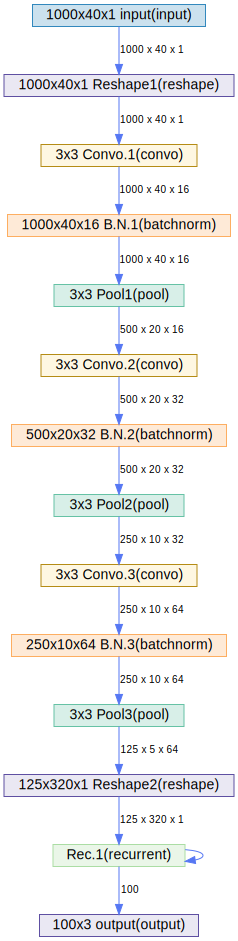

In [21]:
model_cnnrnn.plot_network()

In [23]:
from dlpy.lr_scheduler import *
from dlpy.model import *
lr_scheduler = ReduceLROnPlateau(conn=conn, cool_down_iters=2, gamma=0.1, learning_rate=0.01, patience=3)
solver = MomentumSolver(lr_scheduler = lr_scheduler,
                        clip_grad_max = 100, clip_grad_min = -100)
optimizer = Optimizer(algorithm=solver, mini_batch_size=15, log_level=2, max_epochs=10, reg_l2=0.0005)

The following argument(s) learning_rate, gamma, step_size, power are overwritten by the according arguments specified in lr_scheduler.


In [35]:
data_specs_input = DataSpec(layer='input', type_='numnom', data=feature_table.feature_vars, 
                            numeric_nominal_parms=DataSpecNumNomOpts(length=feature_table.num_of_frames_col,
                                                                    token_size=feature_table.feature_size))

data_specs_output = DataSpec(layer='Output', type_='numnom', data='_label_')

In [37]:
model_cnnrnn.fit(data=feature_table,
              data_specs=[data_specs_input, data_specs_output],
              n_threads=1,
              seed=12345,
              record_seed=3454,
              gpu=dict(devices=1),
              optimizer=optimizer
             )

NOTE: Training based on existing weights.
NOTE: Using dlgrd009.unx.sas.com: 1 out of 4 available GPU devices.
NOTE:  Synchronous mode is enabled.
NOTE:  The total number of parameters is 192511.
NOTE:  The approximate memory cost is 89.00 MB.
NOTE:  Loading weights cost       0.00 (s).
NOTE:  Initializing each layer cost       1.65 (s).
NOTE:  The total number of threads on each worker is 1.
NOTE:  The total mini-batch size per thread on each worker is 15.
NOTE:  The maximum mini-batch size across all workers for the synchronous mode is 15.
NOTE:  Target variable: _label_
NOTE:  Number of levels for the target variable:      3
NOTE:  Levels for the target variable:
NOTE:  Level      0: de
NOTE:  Level      1: en
NOTE:  Level      2: es
NOTE:  Number of input variables: 40000
NOTE:  Number of numeric input variables:  40000
NOTE:  Epoch Learning Rate        Loss  Fit Error   Time(s)
NOTE:  0          0.01          0.8363        0.4     0.29
NOTE:  1          0.01          0.8965     0.6

,Descr,Value
0,Model Name,cnnrnn
1,Model Type,Recurrent Neural Network
2,Number of Layers,14
3,Number of Input Layers,1
4,Number of Output Layers,1
5,Number of Convolutional Layers,3
6,Number of Pooling Layers,3
7,Number of Fully Connected Layers,0
8,Number of Recurrent Layers,1
9,Number of Batch Normalization Layers,3


In [38]:
model_cnnrnn.evaluate(data=feature_table, gpu=dict(devices=1), model_task='CLASSIFICATION')

NOTE: Due to data distribution, miniBatchSize has been limited to 3.
NOTE: Using dlgrd009.unx.sas.com: 1 out of 4 available GPU devices.


[ScoreInfo]

                          Descr         Value
 0  Number of Observations Read            15
 1  Number of Observations Used            15
 2  Misclassification Error (%)            20
 3                   Loss Error      0.633665

[OutputCasTables]

             casLib              Name  Rows  Columns  \
 0  CASUSER(username)  Valid_Res_43BXOx    15    40010   
 
                                                  casTable  
 0  CASTable('Valid_Res_43BXOx', caslib='CASUSER(username)')  

+ Elapsed: 3.51s, user: 2.63s, sys: 0.892s, mem: 1.23e+03mb

In [39]:
model_cnnrnn.valid_conf_mat

,_label_,Col1,Col2,Col3
0,de,3.0,2.0,0.0
1,en,0.0,5.0,0.0
2,es,0.0,1.0,4.0


# Convert Auido to Spectrogram

In [40]:
# convert all audio files into spectrograms and load them into a CAS table as ImageTable
# then any ImageTable API or any image-based CNN models can be used 
audio_table_specgram = AudioTable.load_audio_files(conn, local_audio_path=local_data_dir,
                                                  server_audio_path=server_data_dir,
                                                  as_specgram=True, label_level=-2)

File path: \data_dir\\train
Number of Files: 31
Cannot convert file \data_dir\\train\en\Thumbs.db
File conversions are finished.


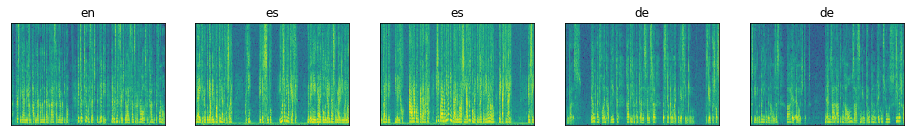

In [41]:
audio_table_specgram.show()

In [42]:
audio_table_specgram.image_summary

jpg                    15
minWidth             1800
maxWidth             1800
minHeight            1200
maxHeight            1200
meanWidth            1800
meanHeight           1200
mean1stChannel    128.976
min1stChannel           0
max1stChannel         142
mean2ndChannel    155.828
min2ndChannel           0
max2ndChannel         231
mean3rdChannel    47.5803
min3rdChannel           0
max3rdChannel         253
dtype: object

In [43]:
conn.endsession()

+ Elapsed: 8.8e-05s, user: 7.8e-05s, mem: 0.221mb